In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import copy

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing

In this study, we are using a Data Source from Kaggle.com ([link to Data](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)). This dataset contains several NaN values and some of the values need to use standard forms.

#### Table of contents

* [Loading the Data](#Loading-the-Data)
* [Removing Duplicates](#Removing-Duplicates)
* [Missing values](Missing-values)
    * [Column 'director_name'](#Column-'director_name')
    * [Column 'budget'](#Column-'budget')
    * [Column 'color'](#Column-'color')
    * [Column 'language'](#Column-'language')
    * [Column 'duration'](#Column-'duration')
    * [Column 'country'](#Column-'country')
    * [Column 'content_rating'](#Column-'content_rating')
    * [Columns contain 'likes'](#Columns-contain 'likes')
    * [Column 'Gross'](#Column-'Gross')

## Loading the Data

In [2]:
Data = pd.read_csv('Data/movie_metadata.csv')
Data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Sorting the columns based on column names

In [3]:
Data = Data.reindex(columns=sorted(Data.columns))
Data.head()

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,color,...,imdb_score,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
0,1000.0,CCH Pounder,936.0,Joel David Moore,855.0,Wes Studi,1.78,237000000.0,4834,Color,...,7.9,English,33000,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Avatar,723.0,3054.0,886204,avatar|future|marine|native|paraplegic,2009.0
1,40000.0,Johnny Depp,5000.0,Orlando Bloom,1000.0,Jack Davenport,2.35,300000000.0,48350,Color,...,7.1,English,0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Pirates of the Caribbean: At World's End,302.0,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,2007.0
2,11000.0,Christoph Waltz,393.0,Rory Kinnear,161.0,Stephanie Sigman,2.35,245000000.0,11700,Color,...,6.8,English,85000,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Spectre,602.0,994.0,275868,bomb|espionage|sequel|spy|terrorist,2015.0
3,27000.0,Tom Hardy,23000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,2.35,250000000.0,106759,Color,...,8.5,English,164000,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,The Dark Knight Rises,813.0,2701.0,1144337,deception|imprisonment|lawlessness|police offi...,2012.0
4,131.0,Doug Walker,12.0,Rob Walker,NaN,NaN,NaN,NaN,143,NaN,...,7.1,NaN,0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,8,NaN,NaN


## Removing unnessary columns

Note that

In [4]:
Drop_column_list = ['facenumber_in_poster', 'movie_imdb_link', 'aspect_ratio']
Data[Drop_column_list].head()

,facenumber_in_poster,movie_imdb_link,aspect_ratio
0,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,1.78
1,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,2.35
2,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,2.35
3,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2.35
4,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN


These three columns are unnecessary for our study. Thus, we are going to remove these columns.
* `facenumber_in_poster`
* `movie_imdb_link`
* `aspect_ratio`

Thus, these columns are dropped from our data

In [5]:
Data.drop(Drop_column_list, axis=1, inplace=True)
del Drop_column_list

## Removing Duplicates

First of all, note that

In [6]:
Data_Duplicated = Data[Data.movie_title.duplicated(keep='last')]
pd.DataFrame(Data_Duplicated.movie_title)

,movie_title
6,Spider-Man 3
17,The Avengers
25,King Kong
30,Skyfall
33,Alice in Wonderland
...,...
3800,Saving Grace
3887,Night of the Living Dead
3984,The Full Monty
4223,The Calling


These values are duplicated!

In [7]:
print("There are %i unique rows from %i."% (len(Data.movie_title.unique()), len(Data.movie_title)))
number_of_duplicated=len(Data.movie_title)-len(Data.movie_title.unique())
print("There are %i duplicated rows."% number_of_duplicated)
del number_of_duplicated, Data_Duplicated

There are 4917 unique rows from 5043.
There are 126 duplicated rows.


Removing the duplicated movies.

In [8]:
Data.drop_duplicates(subset="movie_title", inplace=True)

To get a better understanding of our data, we can use the following plot.

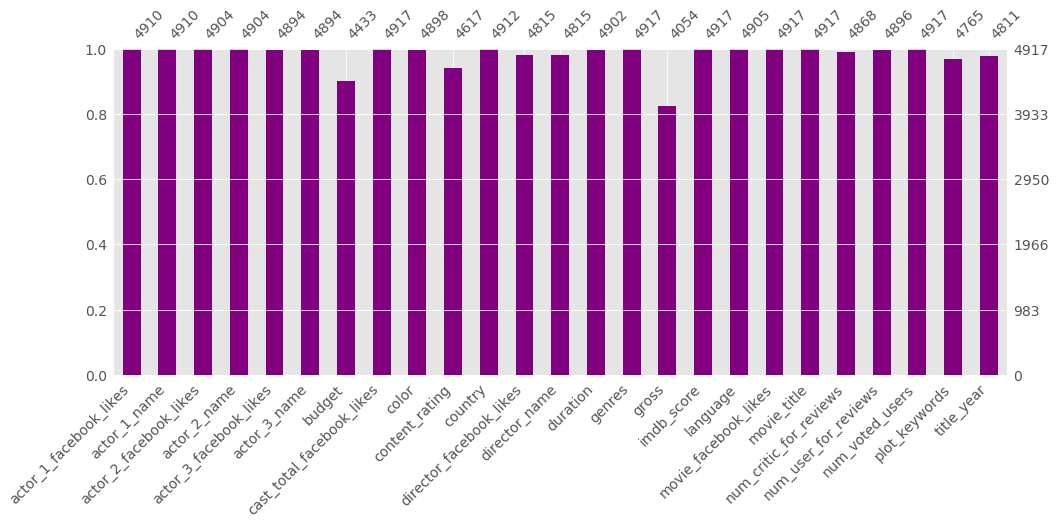

In [9]:
msno.bar(Data,  figsize=(16,6), fontsize=14, log=False, color="purple")

## Missing values

### Column 'director_name'

We can just simply drop rows without `director_name`.

In [10]:
Data.drop(Data[Data.director_name.isna()].index, inplace=True)

### Column 'budget'

Replacing missing `budget` values with the mean value

In [11]:
imp= SimpleImputer(missing_values=np.nan, strategy='mean')
temp=imp.fit_transform(Data['budget'].values.reshape(-1, 1))
Data['budget']=temp
del temp

Column 'color'

For moviess `color`, we have

In [12]:
Ind=Data.color.isna()
Data.loc[Ind, ['movie_title','title_year',  'color']].sort_values(by='title_year', ascending=True).head()

,movie_title,title_year,color
4846,Midnight Cabaret,1990.0,NaN
2753,Shinjuku Incident,2009.0,NaN
1948,Dear John,2010.0,NaN
3638,Snow Flower and the Secret Fan,2011.0,NaN
5020,The Ridges,2011.0,NaN


We can assume that these movies are all in color since the earliest movie on this list is 1990. Thus,

In [13]:
Data.color.fillna('Color', inplace=True)

In [14]:
Data.loc[Ind, ['title_year', 'movie_title', 'color']].sort_values(by='title_year', ascending=True).head()

,title_year,movie_title,color
4846,1990.0,Midnight Cabaret,Color
2753,2009.0,Shinjuku Incident,Color
1948,2010.0,Dear John,Color
3638,2011.0,Snow Flower and the Secret Fan,Color
5020,2011.0,The Ridges,Color


### Column 'language'

As for the `language`, we have,

In [15]:
Data.language.unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'German', 'Aramaic', 'Italian', 'Dutch',
       'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish', 'Korean',
       'Thai', 'Bosnian', 'None', 'Hungarian', 'Portuguese', 'Icelandic',
       'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada', 'Zulu',
       'Panjabi', 'Polish', 'Tamil', 'Dzongkha', 'Vietnamese',
       'Indonesian', 'Urdu', 'Romanian', 'Persian', 'Slovenian', 'Greek',
       'Swahili'], dtype=object)

We can see undesired values usch as *NaN* and *None*. First, let's deal with *None*. We have

In [16]:
Data.loc[Data.language == 'None', 'country']

2895    Canada
3931       USA
Name: country, dtype: object

We can assume that these movies have been produced in English.

In [17]:
Data.loc[Data.language.isna(), 'country']

4       NaN
279     NaN
3086    USA
3539    USA
3869    USA
4110    USA
4409    USA
4630    USA
4810    USA
4885    USA
4958    USA
Name: country, dtype: object

Since most movies are from the USA, we can assume that these movies have been produced in English. Therefore,

In [18]:
Data.language.fillna('English', inplace=True)
Data.language.replace('None', 'English', inplace=True)

### Column 'duration'

We can see that `duration` of some movies are missing.

In [19]:
Data.loc[Data.duration.isna(), ['movie_title','duration']].head()

,movie_title,duration
4,Star Wars: Episode VII - The Force Awakens ...,NaN
199,Harry Potter and the Deathly Hallows: Part II,NaN
206,Harry Potter and the Deathly Hallows: Part I,NaN
1510,Black Water Transit,NaN
3815,Should've Been Romeo,NaN


There is nothing can be done regarding these movies and we are going to simply drop them.

In [20]:
Data.drop(Data.loc[Data.duration.isna()].index, inplace=True)

In [21]:
Data.loc[Data.title_year.isna(), ['movie_title','title_yea']]

,movie_title,title_yea
279,"10,000 B.C.",NaN
2765,Towering Inferno,NaN
2870,Del 1 - Män som hatar kvinnor,NaN


Drop these data as well.

In [22]:
Data.drop(Data.loc[Data.title_year.isna()].index, inplace=True)

### Column 'country'

As for `country`, there is only one movie with the country name.

In [23]:
temp=Data.loc[Data.country.isna(),('movie_title','actor_1_name','actor_2_name','actor_3_name','director_name','country')]
temp

,movie_title,actor_1_name,actor_2_name,actor_3_name,director_name,country
4021,Dawn Patrol,Chris Brochu,Jeff Fahey,Rita Wilson,Daniel Petrie Jr.,NaN


We can search the data for the actor's names and their other movies.

In [24]:
Data.loc[(Data.actor_1_name == temp.actor_1_name.values[0])|
         (Data.actor_2_name == temp.actor_2_name.values[0])|
         (Data.actor_3_name == temp.actor_3_name.values[0]),'country']
del temp

This movie is made in the USA and we can replace *NaN* with the USA.

In [25]:
Data.country.fillna('USA', inplace=True)

### Column 'content_rating'

For movie `ratings`, note that the ratings used since 1996 are [source](https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system)

| Rated | Description |
|-------|----------------------------------------------------------------------------------------|
| G | General audiences – All ages admitted. |
| PG | Parental guidance suggested – Some material may not be suitable for children. |
| PG-13 | Parents strongly cautioned – Some material may be inappropriate for children under 13. |
| R | Restricted – Under 17 requires accompanying parent or adult guardian. |
| NC-17 | No one 17 and under admitted. |

Thus, an standard list of ratings can be found as

In [26]:
Ratings_Standard = np.array(['G', 'PG', 'PG-13', 'R', 'NC-17'], dtype=object)
Ratings_Standard 

array(['G', 'PG', 'PG-13', 'R', 'NC-17'], dtype=object)

However,

In [27]:
Data.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', nan, 'TV-14', 'Not Rated', 'Unrated',
       'Approved', 'NC-17', 'X', 'GP', 'Passed', 'M', 'TV-G', 'TV-PG'],
      dtype=object)

We need to convert

In [28]:
list(set(Data.content_rating.unique().tolist())-set(Ratings_Standard))

[nan,
 'Not Rated',
 'X',
 'Unrated',
 'Approved',
 'Passed',
 'TV-14',
 'GP',
 'TV-G',
 'TV-PG',
 'M']

To the standard form. We can convert these values using the following table.

| Standard Format | Data Format |
|-----------------|--------------------|
| PG | G, TV-G, TV-PG, GP |
| R | M |
| Unrated | NaN,Not Rated |
| Approved | Passed |
| PG-13 | TV-14 |
| NC-17 | X |

In [29]:
Conversation_Map = {'G':'PG', 'TV-G':'PG', 'TV-PG':'PG', 'GP':'PG',
                    'M':'R',
                    np.nan:'Unrated', 'Not Rated':'Unrated',
                    'Passed':'Approved',
                    'TV-14':'PG-13',
                    'NC-17':'NC-17', 'X':'NC-17'}

In [30]:
Data.content_rating = Data.content_rating.map(Conversation_Map)

In [31]:
Data.content_rating.unique()

array([nan, 'PG', 'Unrated', 'PG-13', 'NC-17', 'Approved', 'R'],
      dtype=object)

Af for actors,

In [32]:
Columns=list(Data.columns)
# Reviews Column List
Actors_Column_List=list()
for i in range(len(Columns)):
    if (Columns[i].find('actor') != -1 & Columns[i].find('likes') == -1):
        Actors_Column_List.append(Columns[i])

In [33]:
Data.loc[Data.actor_1_name.isna(), Actors_Column_List]

,actor_1_name,actor_2_name,actor_3_name
4502,NaN,NaN,NaN
4519,NaN,NaN,NaN
4720,NaN,NaN,NaN
4837,NaN,NaN,NaN
4945,NaN,NaN,NaN
4946,NaN,NaN,NaN
4990,NaN,NaN,NaN


Replacing these values with `'None'`.

In [34]:
Data.actor_1_name.fillna('None', inplace=True)
Data.actor_2_name.fillna('None', inplace=True)
Data.actor_3_name.fillna('None', inplace=True)

### Columns contain 'likes'

* Movie Facebook Likes,
* Director Facebook Likes,
* Actor 1 Facebook Likes, 
* Actor 2 Facebook Likes.
* Actor 3 Facebook Likes,
* Cast Total Facebook Likes,


In [35]:
Columns=list(Data.columns)
# Likes List
Likes_List=list()
# Reviews List
Reviews_List=list()

for i in range(len(Columns)):
    if Columns[i].find('likes') != -1:
        Likes_List.append(Columns[i])
    if Columns[i].find('review') != -1:
        Reviews_List.append(Columns[i])
    if Columns[i].find('score') != -1:
        Reviews_List.append(Columns[i])
    if Columns[i].find('vote') != -1:
        Reviews_List.append(Columns[i])

In [36]:
pd.DataFrame(Data[Likes_List].isna().sum(), columns=['Number of NaN'])

,Number of NaN
actor_1_facebook_likes,7
actor_2_facebook_likes,10
actor_3_facebook_likes,17
cast_total_facebook_likes,0
director_facebook_likes,0
movie_facebook_likes,0


We can replace them with zero.

In [37]:
for i in Likes_List:
    Data.loc[:, i].fillna(0, inplace=True)
    
for i in Reviews_List:
    Data.loc[:, i].fillna(0, inplace=True)

del i

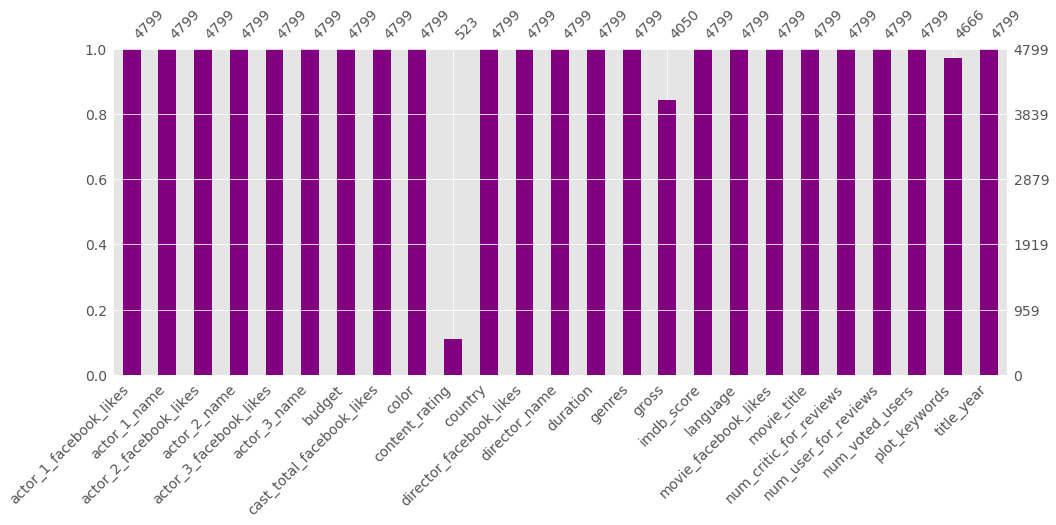

In [38]:
msno.bar(Data,  figsize=(16,6), fontsize=14, log=False, color="purple")

### Column 'Gross'

First, let's look at the correlation plot for our data.

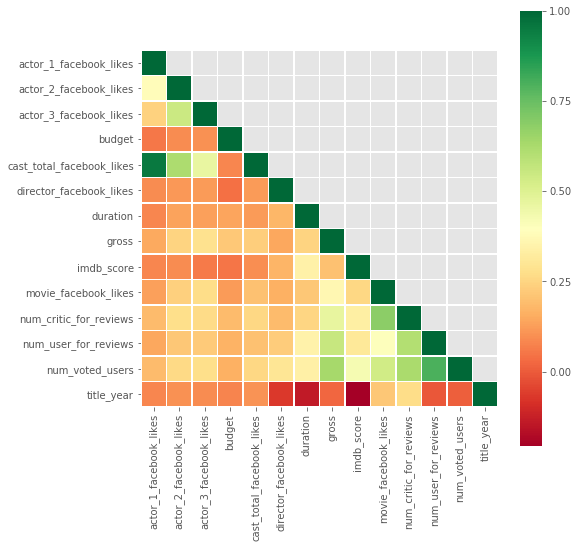

In [39]:
Correlation_Matrix = Data.corr()
mask = np.zeros_like(Correlation_Matrix)
mask[np.triu_indices_from(mask)] = True
for i in range(len(mask)):
    mask[i,i]=0
plt.subplots(figsize=(8,8))
sns.heatmap(Correlation_Matrix, mask=mask, square=True, cmap ="RdYlGn", linewidths = 0.2)
del mask

In [40]:
gross_most_corr_list=list(Correlation_Matrix.gross[Correlation_Matrix.gross > 0.5].index)
gross_most_corr_list.remove('gross')
gross_most_corr_list

['num_user_for_reviews', 'num_voted_users']

It can be seen that `'num_user_for_reviews'` and `'num_voted_users'` are highly correlated with `'gross'`.

In [41]:
gross_null = Data[Data['gross' ].isnull()]
gross_null[['movie_title', 'gross']]

,movie_title,gross
84,The Lovers,NaN
98,Godzilla Resurgence,NaN
242,Asterix at the Olympic Games,NaN
367,Ben-Hur,NaN
422,All That Jazz,NaN
...,...,...
5031,Sanctuary; Quite a Conundrum,NaN
5032,Bang,NaN
5036,The Mongol King,NaN
5038,Signed Sealed Delivered,NaN


and

In [42]:
gross_no_null = Data[~Data['gross' ].isnull()]
gross_no_null[['movie_title', 'gross']]

,movie_title,gross
0,Avatar,760505847.0
1,Pirates of the Caribbean: At World's End,309404152.0
2,Spectre,200074175.0
3,The Dark Knight Rises,448130642.0
5,John Carter,73058679.0
...,...,...
5034,Cavite,70071.0
5035,El Mariachi,2040920.0
5037,Newlyweds,4584.0
5041,Shanghai Calling,10443.0


In [43]:
print('It can be seen that %i entries of the gross column has NaN value.' % len(gross_null))

It can be seen that 749 entries of the gross column has NaN value.


Let's do a further test.

In [44]:
X = gross_no_null.loc[:, gross_most_corr_list]
Y = gross_no_null.gross

In [45]:
# Resampling Methods
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
# Linear Regression
reg = LinearRegression()
reg.fit(X_train, Y_train)
# prediction
Y_pred = reg.predict(X_test)
error = mean_absolute_error(Y_test, Y_pred)
print("Variance : " + str(round(r2_score(Y_test, Y_pred), 3)))

Variance : 0.356


Using the predicated values for gross instead of *Nan* values.

In [46]:
Data.loc[Data.gross.isna(), 'gross'] = reg.predict(Data.loc[Data.gross.isna(), gross_most_corr_list])

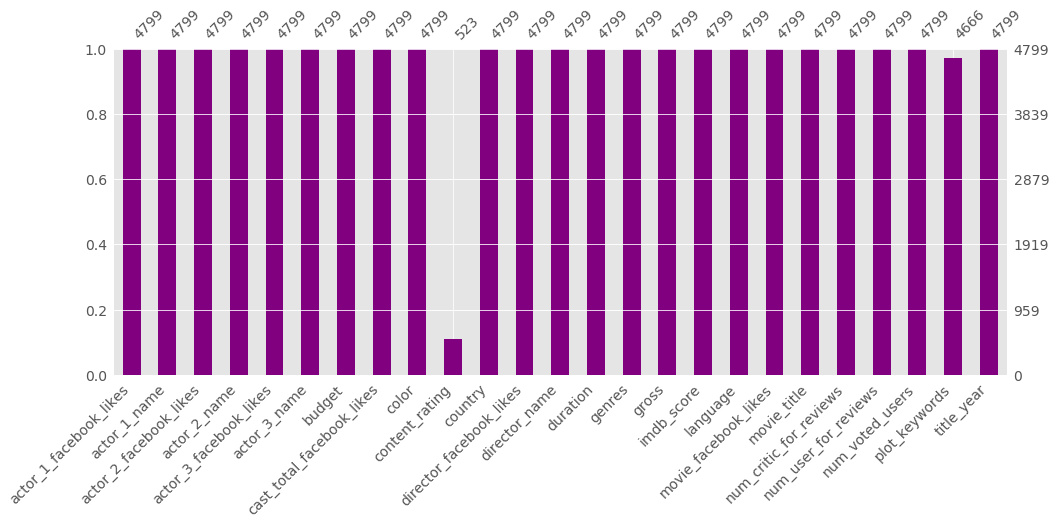

In [47]:
msno.bar(Data,  figsize=(16,6), fontsize=14, log=False, color="purple")

### 4. Saving CSV file

In [49]:
# Save as CSV
Data.to_csv('Data/clean_movie_metadata.csv', index=False)
# Save as MS Excel
Data.to_excel('Data/clean_movie_metadata.xlsx', index=False)